# Fuel consumption ratings and estimated CO₂ emissions

### **Dataset Information**
Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

**Model:**

* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* FFV = Flexible-fuel vehicle
* SWB = Short wheelbase
* LWB = Long wheelbase
* EWB = Extended wheelbase

**Transmission:**
* A = automatic
* AM = automated manual
* AS = automatic with select shift
* AV = continuously variable
* M = manual
* 3 – 10 = Number of gears

**Fuel type:**
* X = regular gasoline
* Z = premium gasoline
* D = diesel
* E = ethanol (E85)
* N = natural gas

**Fuel consumption:** City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

**CO2 emissions:** the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

**CO2 rating:** the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

**Smog rating:** the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)


### Importing the required packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2

### Loading the database

In [2]:
df=pd.read_csv('MY2022 Fuel Consumption Ratings.csv')
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,NaN,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30.0,219.0,5.0,5.0
941,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30.0,219.0,5.0,5.0
942,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29.0,232.0,5.0,NaN
943,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28.0,236.0,5.0,5.0


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         945 non-null    int64  
 1   Make                               945 non-null    object 
 2   Model                              945 non-null    object 
 3   Vehicle Class                      945 non-null    object 
 4   Engine Size(L)                     945 non-null    float64
 5   Cylinders                          945 non-null    int64  
 6   Transmission                       945 non-null    object 
 7   Fuel Type                          944 non-null    object 
 8   Fuel Consumption (City (L/100 km)  931 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   930 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  945 non-null    float64
 11  Fuel Consumption(Comb (mpg))       931 non-null    float64

In [4]:
print(f"Shape of dataset: {df.shape}")
print(f"Size of dataset: {df.size}")

Shape of dataset: (945, 15)
Size of dataset: 14175


In [5]:
df.isnull().sum()

Model Year                            0
Make                                  0
Model                                 0
Vehicle Class                         0
Engine Size(L)                        0
Cylinders                             0
Transmission                          0
Fuel Type                             1
Fuel Consumption (City (L/100 km)    14
Fuel Consumption(Hwy (L/100 km))     15
Fuel Consumption(Comb (L/100 km))     0
Fuel Consumption(Comb (mpg))         14
CO2 Emissions(g/km)                  11
CO2 Rating                           13
Smog Rating                          18
dtype: int64

In [6]:
print(f"Total no. of null(missing) values in dataset : {df.isnull().sum().sum()}")

Total no. of null(missing) values in dataset : 86


### Treating missing values

In [7]:
# for categorical variables replacing missing values with mode

In [8]:
df['Fuel Type'].fillna(df['Fuel Type'].mode()[0],inplace=True)

In [9]:
df['CO2 Rating'].fillna(df['CO2 Rating'].mode()[0],inplace=True)

In [10]:
df['Smog Rating'].fillna(df['Smog Rating'].mode()[0],inplace=True)

In [11]:
# for continuous numerical variables replacing missing values with median

In [12]:
df['Fuel Consumption (City (L/100 km)'].fillna(df['Fuel Consumption (City (L/100 km)'].median(),inplace=True)

In [13]:
df['Fuel Consumption(Hwy (L/100 km))'].fillna(df['Fuel Consumption(Hwy (L/100 km))'].median(),inplace=True)

In [14]:
df['Fuel Consumption(Comb (mpg))'].fillna(df['Fuel Consumption(Comb (mpg))'].median(),inplace=True)

In [15]:
df['CO2 Emissions(g/km)'].fillna(df['CO2 Emissions(g/km)'].median(),inplace=True)

In [16]:
print(f"Total no. of null(missing) values in dataset : {df.isnull().sum().sum()}")

Total no. of null(missing) values in dataset : 0


In [17]:
print(f'No. of duplicated rows = {df.duplicated().sum()}')

No. of duplicated rows = 0


### Descriptive Statistical Analysis

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Model Year,945.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0
Engine Size(L),945.0,3.199683,1.375231,1.2,2.0,3.0,3.8,8.0
Cylinders,945.0,5.669841,1.932930,3.0,4.0,6.0,6.0,16.0
Fuel Consumption (City (L/100 km),945.0,12.501799,3.413909,4.0,10.3,12.2,14.7,30.3
Fuel Consumption(Hwy (L/100 km)),945.0,9.356085,2.273979,3.9,7.7,9.2,10.6,20.9
Fuel Consumption(Comb (L/100 km)),945.0,11.093439,2.877491,4.0,9.1,10.8,12.9,26.1
Fuel Consumption(Comb (mpg)),945.0,27.241270,7.668101,11.0,22.0,26.0,31.0,71.0
CO2 Emissions(g/km),945.0,259.112698,63.958058,94.0,214.0,257.5,299.0,608.0
CO2 Rating,945.0,4.556614,1.460359,1.0,3.0,5.0,5.0,10.0
Smog Rating,945.0,4.953439,1.665945,1.0,3.0,5.0,6.0,7.0


In [19]:
df_fueltype = df.groupby(['Fuel Type'],as_index=False).mean()
df_fueltype

,Fuel Type,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,D,2022.0,2.964286,5.642857,11.282143,8.664286,10.117857,27.928571,271.571429,4.142857,2.571429
1,E,2022.0,4.457143,7.142857,19.200000,14.992857,17.692857,16.285714,294.857143,3.642857,4.285714
2,X,2022.0,2.877252,5.040541,11.254505,8.780631,10.124324,30.027027,238.022523,5.047297,5.720721
3,Z,2022.0,3.487582,6.235294,13.578431,9.783007,11.889107,24.838780,277.663399,4.135076,4.376906


Fuel type:
 X = regular gasoline; Z = premium gasoline; D = diesel; E = E85; 
 
E85 gas which is made up of between 51% and 83% ethanol blended with gasoline seems to have the highest CO2 emissions and subsequently lowest CO2 rating. Its fuel consumption is also very high in both city and highway. Regular gasoline seems to be fuel efficient both in terms of consumption and emission. 

In [20]:
df.nunique()

Model Year                             1
Make                                  39
Model                                715
Vehicle Class                         14
Engine Size(L)                        36
Cylinders                              8
Transmission                          23
Fuel Type                              4
Fuel Consumption (City (L/100 km)    149
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Comb (mpg))          49
CO2 Emissions(g/km)                  242
CO2 Rating                            10
Smog Rating                            5
dtype: int64

In [21]:
cat_col = ['Make','Model','Vehicle Class','Cylinders','Transmission','Fuel Type','CO2 Rating','Smog Rating']
num_col = set(df.columns) - set(cat_col)

In [22]:
for i in cat_col:
    print(f'Column : {i}')
    print()
    print(df[i].value_counts())
    print()

Column : Make

Ford             88
Chevrolet        80
Porsche          77
BMW              60
GMC              54
Toyota           51
Audi             45
Mercedes-Benz    43
Jeep             34
Hyundai          29
Lexus            28
Cadillac         26
Kia              25
Nissan           23
Honda            23
Mazda            23
Dodge            21
MINI             20
Subaru           19
Volkswagen       18
Land Rover       18
Ram              16
Maserati         13
Volvo            12
Buick             9
Acura             8
Lamborghini       8
Infiniti          8
Genesis           8
Bentley           8
Jaguar            8
Lincoln           7
Mitsubishi        7
Rolls-Royce       7
Alfa Romeo        6
Chrysler          6
Aston Martin      5
Bugatti           3
FIAT              1
Name: Make, dtype: int64

Column : Model

Silverado 4WD Mud Terrain Tire    5
Sierra 4WD                        5
Silverado 4WD                     5
Sierra 4WD Mud Terrain Tire       5
F-150 FFV          

## Univariate Analysis

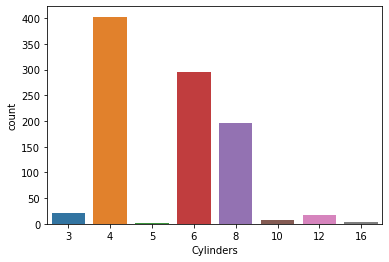

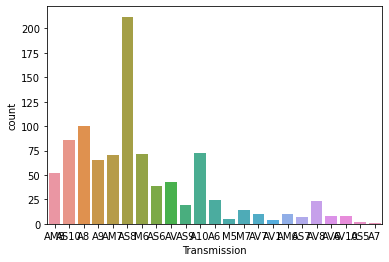

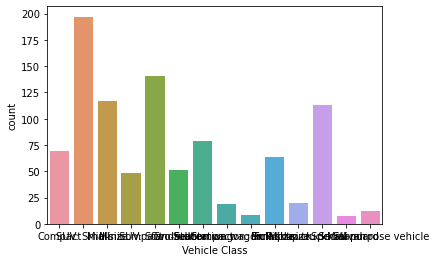

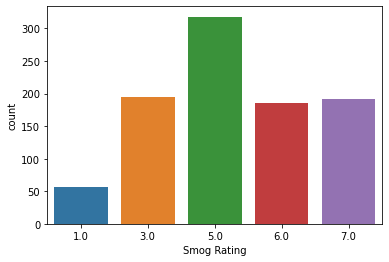

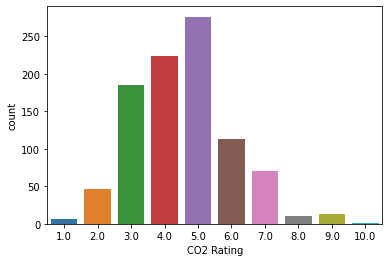

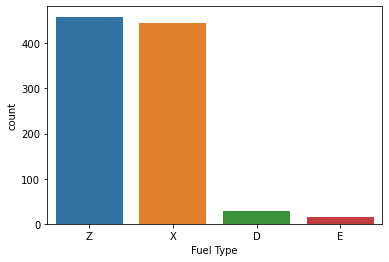

In [23]:
list1 = ['Cylinders','Transmission','Vehicle Class','Smog Rating','CO2 Rating','Fuel Type']
for i in list1:
    plt.show()
    sns.countplot(x=df[i])

D:\DS\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\DS\ANACONDA\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


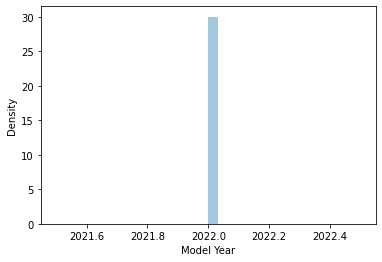

D:\DS\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


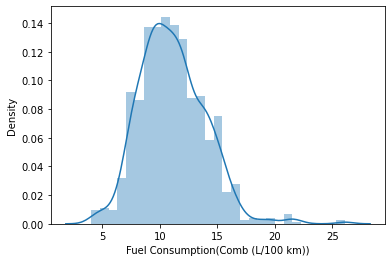

D:\DS\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


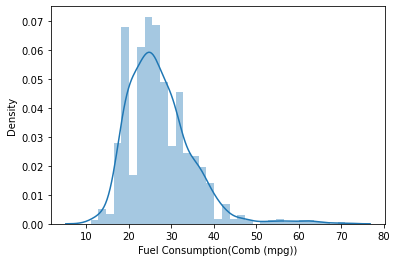

D:\DS\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


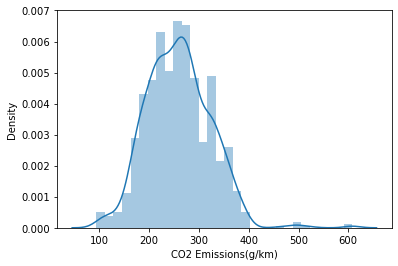

D:\DS\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


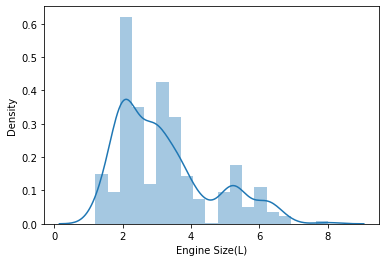

D:\DS\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


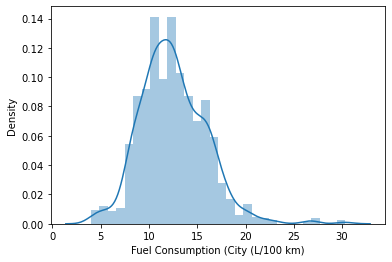

D:\DS\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


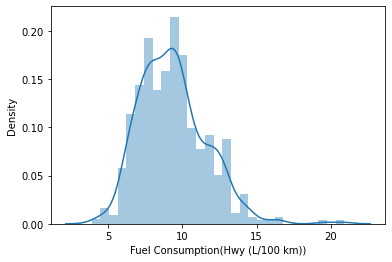

In [24]:
for i in num_col:
    sns.distplot(df[i],label=f'{i}')
    plt.show()

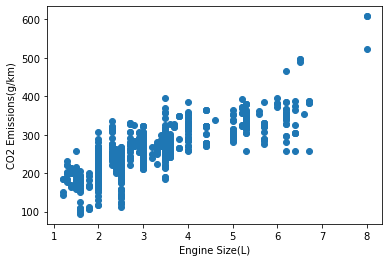

In [25]:
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
plt.xlabel("Engine Size(L)")
plt.ylabel("CO2 Emissions(g/km)")
plt.show()

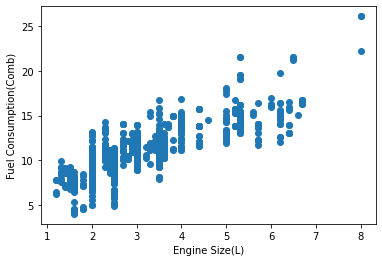

In [26]:
plt.scatter(df['Engine Size(L)'], df['Fuel Consumption(Comb (L/100 km))'])
plt.xlabel("Engine Size(L)")
plt.ylabel("Fuel Consumption(Comb)")
plt.show()

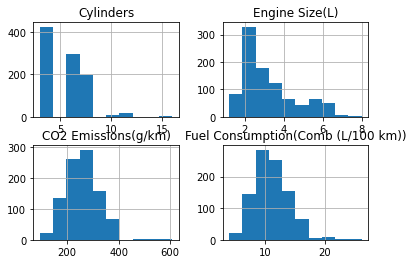

In [27]:
viz = df[['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']]
viz.hist()
plt.show()

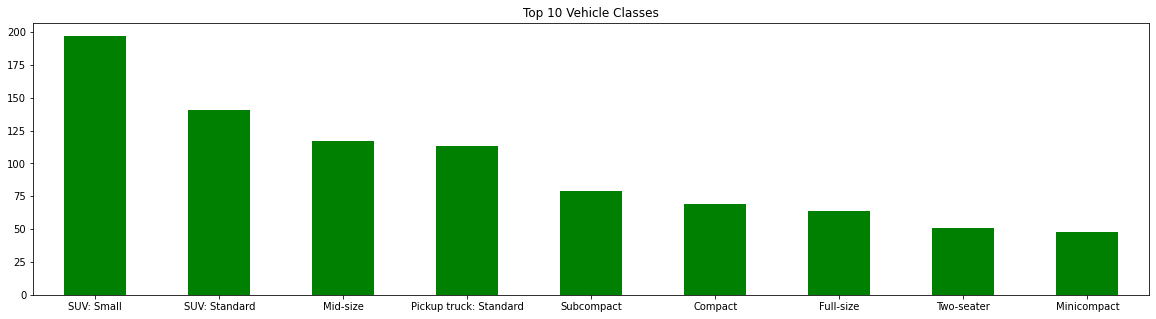

In [28]:
df['Vehicle Class'].value_counts().sort_values(ascending=False).iloc[0:9].plot(kind='bar',rot=0,figsize=(20,5),color='green',title='Top 10 Vehicle Classes');

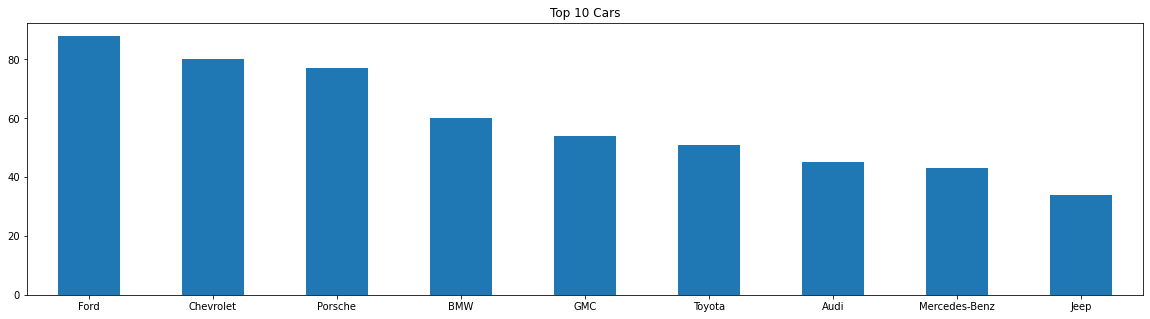

In [29]:
df['Make'].value_counts().sort_values(ascending=False).iloc[0:9].plot(kind='bar',figsize=(20,5),rot=0,title = 'Top 10 Cars');

## Multivariate Analysis

### Pair Plot

In [ ]:
sns.pairplot(df,diag_kind='kde')

### Heat Map

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True);

### **Box Plots**
A box plot is a way of statistically representing the distribution of the data through five main dimensions:
* Minimun: Smallest number in the dataset.
* First quartile: Middle number between the minimum and the median.
* Second quartile (Median): Middle number of the (sorted) dataset.
* Third quartile: Middle number between median and maximum.
* Maximum: Highest number in the dataset.


In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df,showmeans=True);

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True);

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=df,showmeans=True);

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=df,showmeans=True);

### Chi-Square Test of Independence

A Chi-Square Test of Independence is used to determine whether or not there is a significant association between two categorical variables.

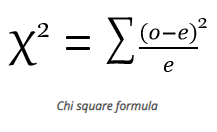

**P-value:**

In statistical analysis P-value is used to know the significance of the correlation estimate.The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.
By convention, when the
* p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
* p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
* p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
* p-value is $>$ 0.1: there is no evidence that the correlation is significant.

This information is obtained using "stats" module in the "scipy" library.

#### Relationship between Vehicle Class and Transmission

In [ ]:
dataset_table1 = pd.crosstab(df['Vehicle Class'],df['Transmission'])
dataset_table1

In [ ]:
observed_values = dataset_table1.values
val=stats.chi2_contingency(dataset_table1)
expected_values = val[3]

In [ ]:
no_of_rows=14
no_of_columns=23
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

In [ ]:
chi_square=sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square_statistic = chi_square.sum()
chi_square_statistic

In [ ]:
#p-value
p_value = 1 - stats.chi2.cdf(x=chi_square_statistic,df=ddof)

print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

In [ ]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")  # H0 - Null Hypothesis
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

#### Relationship between Fuel Type and Transmission

In [ ]:
dataset_table2 = pd.crosstab(df['Fuel Type'],df['Transmission'])
observed_values = dataset_table2.values
val=stats.chi2_contingency(dataset_table2)
expected_values = val[3]

In [ ]:
no_of_rows=4
no_of_columns=23
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

In [ ]:
chi_square=sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
chi_square_statistic = chi_square.sum()
chi_square_statistic

In [ ]:
#p-value
p_value = 1 - stats.chi2.cdf(x=chi_square_statistic,df=ddof)

print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

In [ ]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

### **Conclusion:** 

Since the p-value is < 0.001, all inter correlations between Vehicle Class, Transmission and Fuel Types are statistically significant, and their linear relationship are also extremely strong (>0.80)

Dropping ‘Fuel Consumption (City (L/100 km)’, 'Fuel Consumption (Hwy (L/100 km))', 'Fuel Consumption (Comb (mpg))', and any unnecessary columns

In [ ]:
df.drop(['Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))','Model Year'],axis=1)

#### Encode categorical variables

In [ ]:
z = df[['Vehicle Class', 'Transmission', 'Fuel Type']]

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
z = enc.fit_transform(z)
df[['Vehicle Class', 'Transmission', 'Fuel Type']] = pd.DataFrame(z)

#### Split into train and test set and Scale the variables

In [ ]:
X = df[['Engine Size(L)', 'Transmission', 'CO2 Emissions(g/km)', 'Smog Rating']]
y = df['Fuel Consumption(Comb (L/100 km))']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

### Linear Regression Model

In [ ]:
from sklearn import linear_model
mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)


In [ ]:
Yhat_mlm = mlm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))

In [ ]:
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, Yhat_mlm))

In [ ]:
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))
print('R2 of Multiple Linear regression:',metrics.r2_score(y_test, Yhat_mlm))
print('R2 rounded of Multiple Linear regression:',(metrics.r2_score(y_test, Yhat_mlm)).round(2))
r2 = r2_score(y_test, Yhat_mlm)
r2_rounded = r2_score(y_test, Yhat_mlm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Multiple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

### Decision Tree Regression Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

In [ ]:
DTR.fit (X_train, y_train)
Yhat_DTR = DTR.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Decision Tree regression:', metrics.mean_absolute_error(y_test, Yhat_DTR))
print('Mean Squared Error(MSE) of Decision Tree regression:', metrics.mean_squared_error(y_test, Yhat_DTR))
print('Root Mean Squared Error (RMSE) of Decision Tree regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_DTR)))

In [ ]:
# Explained variance score: 1 is perfect prediction
print('Variance score of Decision Tree regression: %.2f' % DTR.score(X_train, y_train))
print('Explained Variance Score (EVS) of Decision Tree regression:',explained_variance_score(y_test, Yhat_DTR))

In [ ]:
#Residual sum of squares (rss)
print("Residual sum of squares of Decision Tree regression: %.2f" % np.mean((Yhat_DTR - y_test) ** 2))
print('R2 of Decision Tree regression:',metrics.r2_score(y_test, Yhat_DTR))
print('R2 rounded of Decision Tree regression:',(metrics.r2_score(y_test, Yhat_DTR)).round(2))
r2 = r2_score(y_test, Yhat_DTR)
r2_rounded = r2_score(y_test, Yhat_DTR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Decision Tree regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = DTR.score(X_test, y_test)
print("Accuracy of Decision Tree regression: {}".format(accuracy))

### Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()

In [ ]:
RFR.fit (X_train, y_train)
Yhat_RFR = RFR.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Random Forest regression:', metrics.mean_absolute_error(y_test, Yhat_RFR))
print('Mean Squared Error(MSE) of Random Forest regression:', metrics.mean_squared_error(y_test, Yhat_RFR))
print('Root Mean Squared Error (RMSE) of Random Forest regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_RFR)))

In [ ]:
# Explained variance score: 1 is perfect prediction
print('Variance score of Random Forest regression: %.2f' % RFR.score(X_train, y_train))
print('Explained Variance Score (EVS) of Random Forest regression:',explained_variance_score(y_test, Yhat_RFR))

In [ ]:
#Residual sum of squares (rss)
print("Residual sum of squares of Random Forest regression: %.2f" % np.mean((Yhat_RFR - y_test) ** 2))
print('R2 of Random Forest regression:',metrics.r2_score(y_test, Yhat_RFR))
print('R2 rounded of Random Forest regression:',(metrics.r2_score(y_test, Yhat_RFR)).round(2))
r2 = r2_score(y_test, Yhat_RFR)
r2_rounded = r2_score(y_test, Yhat_RFR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Random Forest regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = RFR.score(X_test, y_test)
print("Accuracy of Random Forest regression: {}".format(accuracy))

### Support Vector Regression Model

In [ ]:
from sklearn.svm import SVR
SVR = SVR()

In [ ]:
SVR.fit (X_train, y_train)
Yhat_SVR = SVR.predict(X_test)

k = X_test.shape[1]
n = len(X_test)


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Support Vector regression:', metrics.mean_absolute_error(y_test, Yhat_SVR))
print('Mean Squared Error(MSE) of Support Vector regression:', metrics.mean_squared_error(y_test, Yhat_SVR))
print('Root Mean Squared Error (RMSE) of Support Vector regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_SVR)))

In [ ]:
# Explained variance score: 1 is perfect prediction
print('Variance score of Support Vector regression: %.2f' % SVR.score(X_train, y_train))
print('Explained Variance Score (EVS) of Support Vector regression:',explained_variance_score(y_test, Yhat_SVR))

In [ ]:
#Residual sum of squares (rss)
print("Residual sum of squares of Support Vector regression: %.2f" % np.mean((Yhat_SVR - y_test) ** 2))
print('R2 of Support Vector regression:',metrics.r2_score(y_test, Yhat_SVR))
print('R2 rounded of Support Vector regression:',(metrics.r2_score(y_test, Yhat_SVR)).round(2))
r2 = r2_score(y_test, Yhat_SVR)
r2_rounded = r2_score(y_test, Yhat_SVR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Support Vector regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = SVR.score(X_test, y_test)
print("Accuracy of Support Vector regression: {}".format(accuracy))

### Checking their performance, and comment on which is the best model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
Models=[("Linear Regression",LinearRegression()),
         ("Decision Tree",DecisionTreeRegressor()),
         ("Random Forest",RandomForestRegressor()),
        ("SVR",SVR ())]
Model_output=[]
for name,model in Models:
    yhat=model.fit(X_train, y_train).predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, yhat)
    MSE = metrics.mean_squared_error(y_test, yhat)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, yhat))
    Variance_score = model.score(X_train, y_train)
    Explained_Variance_score= explained_variance_score(y_test, yhat)
    R2_score = r2_score(y_test, yhat)
    Train_set_MAE = metrics.mean_absolute_error(y_train, model.predict(X_train))
    Model_output.append((name, Train_set_MAE, MAE,MSE,RMSE, Variance_score, Explained_Variance_score,R2_score))
    final_Report=pd.DataFrame(Model_output, columns=['Algorithm','Train_set_MAE', 'MAE', 'MSE', 'RMSE', 'Variance_score', 'Explained_Variance_score','R2 score'])

In [ ]:
final_Report

#### Compulsory
##### Use grid search CV to tune the hyperparameter of the best model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()# Best model Random Forest

In [ ]:
X = df[['Engine Size(L)', 'Transmission', 'CO2 Emissions(g/km)', 'Smog Rating']]
Y = df['Fuel Consumption(Comb (L/100 km))']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=2021)

In [ ]:
# make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [20, 40, 60],
    "max_depth" : [2, 8, 9],
    "max_features" : [0.2, 0.6],
    "max_samples" : [0.5, 0.75, 1.0]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = RFR,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

In [ ]:
GS.fit(X_train, Y_train)

In [ ]:
print(GS.best_estimator_) # to get the complete details of the best model

In [ ]:
print(GS.best_params_) # to get only the best hyperparameter values that we searched for

In [ ]:
print(GS.best_score_) # score according to the metric we passed in refit

### Train a polynomial regression model with degree 2, and 3 and compare it’s performance with other models 

In [ ]:
X = df[['Engine Size(L)', 'Transmission', 'CO2 Emissions(g/km)', 'Smog Rating']]
y = df['Fuel Consumption(Comb (L/100 km))']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

In [ ]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Random Forest regression:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE) of Random Forest regression:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) of Random Forest regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Random Forest regression:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE) of Random Forest regression:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) of Random Forest regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))